# import libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, max_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Car Dataset

In [2]:
cardata_df=pd.read_csv('C:/Users/SHARON/Downloads/Cardetails.csv')
cardata_df.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data Cleaning

In [3]:
cardata_df.drop(['torque'], axis=1, inplace=True)
cardata_df.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [4]:
cardata_df.shape

(8128, 12)

In [5]:
cardata_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [6]:
cardata_df=cardata_df.dropna(axis=0)

In [7]:
cardata_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [8]:
def ConvertToNumber(s:str):
    if pd.isna(s):
        return np.nan
    if isinstance(s, float):
        return s
    d=""
    for i in str(s):
        if(i.isdigit() or i=='.'):
            d+=i
    return float(d) if d else np.nan

In [9]:
cardata_df['mileage']=cardata_df['mileage'].apply(ConvertToNumber)
cardata_df['engine']=cardata_df['engine'].apply(ConvertToNumber)
cardata_df['max_power']=cardata_df['max_power'].apply(ConvertToNumber)
cardata_df['seats']=cardata_df['seats'].apply(ConvertToNumber)

In [10]:
cardata_df.shape

(7907, 12)

In [11]:
cardata_df.duplicated().sum()

1189

In [12]:
cardata_df.drop_duplicates(inplace=True)

In [13]:
cardata_df.shape

(6718, 12)

In [14]:
# Convert text data to numerical values using LabelEncoder
label_encoders = {}
for column in ['name', 'fuel', 'seller_type', 'transmission', 'owner']:
    le = LabelEncoder()
    cardata_df[column] = le.fit_transform(cardata_df[column])
    label_encoders[column] = le
cardata_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1250,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,1547,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,375,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,743,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,1291,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1351,2013,260000,50000,3,1,1,2,18.90,998.0,67.10,5.0
8122,735,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,733,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85,5.0
8124,618,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00,5.0


# Outlier Removal and Log Transformation of Selling Prices in Car Dataset

In [15]:
Q1 = cardata_df['selling_price'].quantile(0.25) 
Q3 = cardata_df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR
cardata_df = cardata_df[(cardata_df['selling_price'] >= lower_bound) & (cardata_df['selling_price'] <= upper_bound)]
cardata_df['selling_price'] = np.log1p(cardata_df['selling_price'])

In [16]:
X = cardata_df.drop(['selling_price'], axis=1)
y = cardata_df['selling_price']

# Splitting Data into Training and Testing Tests

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling Features Using Robust Scaler

In [18]:
 scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Training and Evaluating the Random Forest Regression Model

In [19]:
model=RandomForestRegressor()
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
r2_score_model=r2_score(y_test, y_pred)
max_error_model=max_error(y_test, y_pred)
mean_squared_error_model=mean_squared_error(y_test, y_pred)
print(f"r2_score:{r2_score_model}")
print(f"max_error:{max_error_model}")
print(f"mean_squared_error:{mean_squared_error_model}")

r2_score:0.9028996612250071
max_error:1.0073510504185101
mean_squared_error:0.04498016998307752


# Visualizing the Distribution of Actual and Predicted Car Prices

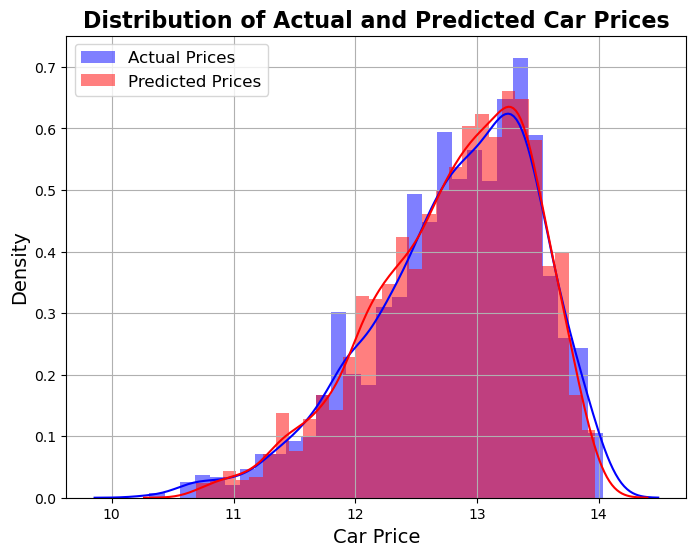

In [21]:
import seaborn as sns
predictions = model.predict(X_test)
# Plot the results
plt.figure(figsize=(8, 6), dpi=100)
sns.distplot(y_test, bins=30, kde=True, label='Actual Prices', color='blue', hist_kws={'alpha': 0.5})
sns.distplot(predictions, bins=30, kde=True, label='Predicted Prices', color='red', hist_kws={'alpha': 0.5})
plt.title('Distribution of Actual and Predicted Car Prices', fontsize=16, fontweight='bold') 
plt.xlabel('Car Price', fontsize=14) 
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

In [22]:
import pickle

pickle.dump(model, open('CAR PRICE PREDICTION_ML', 'wb'))